<a href="https://colab.research.google.com/github/Bone-Age-Maisha/Bone_imp_1/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2
import os
import pandas as pd



In [35]:
import pandas as pd
train_dir = '/content/drive/MyDrive/hand_atlas/image'
df = pd.read_csv('/content/drive/MyDrive/hand_atlas/data.csv')

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [74]:
image = cv2.imread('/content/drive/MyDrive/small_data/train/1378.png')#image

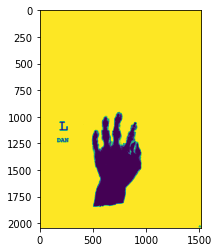

In [75]:
from matplotlib import pyplot as plt
low=np.array([30,30,30])
high=np.array([200,200,200])
mask=cv2.inRange(image,low,high)
plt.imshow(mask)

#paper 1 code part

In [76]:
import cv2
import numpy as np
import os


    

def crop(img,mask):
    index = np.where(mask>0)
    top =np.min(index[0])
    bottom = np.max(index[0]) 
    left = np.min(index[1])
    right = np.max((index[1]))
    #extract hand region
    if top > 200:
        top =top -180
    elif top > 100:
        top = top -50

   # extract region1
   # if left>100:
   #     left=left-70

    croped_img = img[top:bottom,left:right]
    return croped_img



def maskout(img,mask):
    index = np.where(mask>0)
    top =np.min(index[0])
    bottom = np.max(index[0]) 
    left = np.min(index[1])
    right = np.max((index[1]))
    img[top:bottom,left:right]=np.random.randint(255)
    return img


def find_max_component(mask):
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    area = []
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))
    max_ind = np.argmax(area)
    print (area)
    for ind in range(len(contours)):
        if ind != max_ind:
            cv2.fillConvexPoly(mask,contours[ind],0)
    return mask





kernel = np.ones((5,5),np.uint8)
  
img = cv2.imread('/content/drive/MyDrive/small_data/train/1378.png',0)
#heatmap = cv2.imread('/content/1387.png',0)
ret,mask =  cv2.threshold(mask,20,255,cv2.THRESH_BINARY_INV)
mask = find_max_component(mask)
# mask = cv2.dilate(mask,kernel,iterations=1)
# cv2.imwrite('patches/'+path,mask)
# img = img*mask
# cv2.imwrite('patches/'+path,img)


#print (path)
croped_img= crop(img,mask)
cv2.imwrite('/content/mask1/1378.png',croped_img)
#cv2.imwrite('/content/mask1/'+path,mask)

[103.0, 202.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 15.5, 2.0, 2.0, 2.0, 4.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 0.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 5.5, 0.0, 12.5, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.5, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 8.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 5.5, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 21.0, 4.0, 2.0, 2.0, 0.0, 0.0, 2.0, 5.5, 2.0, 4.0, 4.0, 13.5, 4.0, 0.5, 4.0, 0.0, 2.0, 0.0, 2.0, 4.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 0.0, 0.0, 0.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 7.0, 0.0, 10.0, 5.5, 5.5, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 0.5, 2.0, 2.0, 5.5, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 10.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2.0, 6.0, 2.0, 2.0, 4.0, 2.0, 5.5, 2.0, 2.0, 6.0, 2.0, 6.0, 2.0, 4.0, 0.0, 6.0, 2.0, 2.0, 0.5, 4.0, 2.0, 5.5, 2.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 5.5, 2.0,

True

#kmeans clustering

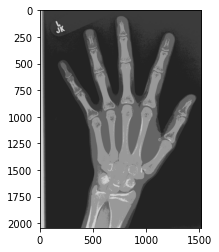

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('/content/drive/MyDrive/small_data/train/1377.png')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
#plt.imshow(image)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
cv2.imwrite('/content/1378.png',segmented_image)
 
plt.imshow(segmented_image)

In [47]:
image.shape


(2044, 1514, 3)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

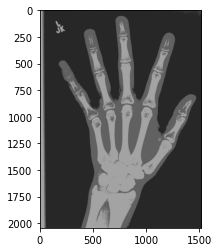

#grabcut

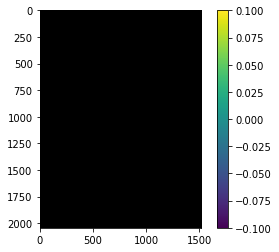

In [ ]:
# Python program to illustrate
# foreground extraction using
# GrabCut algorithm
  
# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt
  
# path to input image specified and
# image is loaded with imread command
image = cv2.imread('/content/drive/MyDrive/small_data/train/1377.png')
  
# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)
  
# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
  
# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (300, 300, 150, 150)
  
# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used
cv2.grabCut(image, mask, rectangle, 
            backgroundModel, foregroundModel,
            3, cv2.GC_INIT_WITH_RECT)
  
# In the new mask image, pixels will
# be marked with four flags
# four flags denote the background / foreground
# mask is changed, all the 0 and 2 pixels
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
  
# The final mask is multiplied with
# the input image to give the segmented image.
image = image * mask2[:, :, np.newaxis]
  
# output segmented image with colorbar
plt.imshow(image)
plt.colorbar()
plt.show()

#paper_1

In [12]:
import pandas as pd
train_dir = '/content/drive/MyDrive/small_data/train'
df = pd.read_csv('/content/drive/MyDrive/small_data/train_csv1.csv')

In [13]:
X_train = []
y_age = []
y_gender = []

#df = pd.read_csv('/raid/chenchao/code/BoneAge/BoneAge/data/Training.csv')
a = df.values
m = a.shape[0]

cnt=1
path = train_dir
k = 0
print ('Loading data set...')
k=1
for i in os.listdir(path):
  #print(i)
  print(cnt)
  cnt=cnt+1
  if(len(i)>9):   #errror occuring  so to 
    continue
  y_age.append(df.boneage[df.id == int(i[:-4])].tolist()[0])
  a = df.male[df.id == int(i[:-4])].tolist()[0]
  if a:
    y_gender.append(1)
  else:
     y_gender.append(0)
  img_path = path + "/"+i
  img = cv2.imread(img_path)
  #print(img.shape)
  print (img_path)
  img = cv2.imread(img_path)
    #print (img_path)
    #if(img is not None):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(256,256))
  x = np.asarray(img, dtype=np.uint8)
  X_train.append(x)
    
print ('100% completed loading data')





Loading data set...
1
/content/drive/MyDrive/small_data/train/1378.png
2
/content/drive/MyDrive/small_data/train/1377.png
3
/content/drive/MyDrive/small_data/train/1379.png
4
/content/drive/MyDrive/small_data/train/1380.png
5
/content/drive/MyDrive/small_data/train/1381.png
6
/content/drive/MyDrive/small_data/train/1385.png
7
/content/drive/MyDrive/small_data/train/1383.png
8
/content/drive/MyDrive/small_data/train/1384.png
9
/content/drive/MyDrive/small_data/train/1382.png
10
/content/drive/MyDrive/small_data/train/1387.png
11
/content/drive/MyDrive/small_data/train/1388.png
12
/content/drive/MyDrive/small_data/train/1390.png
13
/content/drive/MyDrive/small_data/train/1391.png
14
/content/drive/MyDrive/small_data/train/1389.png
15
/content/drive/MyDrive/small_data/train/1395.png
16
/content/drive/MyDrive/small_data/train/1393.png
17
/content/drive/MyDrive/small_data/train/1394.png
18
/content/drive/MyDrive/small_data/train/1399.png
19
/content/drive/MyDrive/small_data/train/1398.png
2

In [15]:
!pip install visualization 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 13.8 MB/s 
     |████████████████████████████████| 669 kB 69.9 MB/s 
     |████████████████████████████████| 116 kB 80.7 MB/s 
     |████████████████████████████████| 132 kB 77.9 MB/s 
     |████████████████████████████████| 109 kB 78.8 MB/s 
     |████████████████████████████████| 964 kB 59.4 MB/s 
     |████████████████████████████████| 978 kB 67.9 MB/s 
     |████████████████████████████████| 2.2 MB 64.3 MB/s 
     |████████████████████████████████| 555 kB 75.5 MB/s 
     |████████████████████████████████| 1.1 MB 60.1 MB/s 
     |████████████████████████████████| 212 kB 71.6 MB/s 
     |████████████████████████████████| 104 kB 75.2 MB/s 
     |████████████████████████████████| 1.0 MB 69.1 MB/s 
     |████████████████████████████████| 40 kB 5.6 MB/s 
     |████████████████████████████████| 107 kB 82.0 MB/s 
  Created wheel for PyOpenGL: fil

In [36]:
from visualization import *
import numpy as np
import cv2
from keras import backend as K
from keras.preprocessing import image
import os


def ShowAttentionV1(model,image_path):
    file_list = os.listdir(image_path)
    file_list.sort()
    for filename in file_list:
        print (filename)
        filepath=image_path+filename
        image=load_image(filepath)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        layer=K.function([model.layers[0].input],[model.layers[196].output])
        FeatureMap=layer([image,gender])[0]
        print (FeatureMap.shape)
        FeatureMap = np.squeeze(FeatureMap, axis=0)
        FeatureMap = np.abs(FeatureMap)
        heatmap = np.mean(FeatureMap,axis=2)
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
    print ('********** Done ***********')




def GAPAttention(model,weights,image_path):

    k=1
    for filename in os.listdir(image_path):
        if k==72:
          break
        filepath=image_path+filename
        print (filepath)
        image=load_image(filepath)
        image = image/255.0
        gender=1.0
        gender=np.asarray(gender)
        gender=np.expand_dims(gender,axis=0)
        layer=K.function([model.layers[0].input,model.layers[4].input],[model.layers[1].get_output_at(-1),model.layers[-1].output])
        GAP,prediction=layer([image,gender])
        GAP=np.squeeze(GAP,axis=0)
        print (GAP.shape)
        index = np.argmax(prediction)
        print (index)
       # weight = weights[:,index]
        weight =np.mean(weights[:,index-5:index+5],axis=1)
        heatmap = np.zeros((GAP.shape[0],GAP.shape[1]))
        for k in range(GAP.shape[2]):
            heatmap = heatmap + weight[k]*GAP[:,:,k]
        heatmap = heatmap/np.max(heatmap)
        heatmap = np.uint8(255*heatmap)
        print (heatmap.shape)
        heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
        SaveImg(filename,filepath,heatmap)
        k=k+1
        
    print ('********** Done ***********')



def SaveImg(filename,filepath,heatmap):
    img = cv2.imread(filepath)
    heatmap = cv2.resize(heatmap,(img.shape[1],img.shape[0]))
    AttentionImg =0.5* heatmap + img
    cv2.imwrite('/content/heatmap/'+filename,heatmap)
    cv2.imwrite('/content/atten/'+filename,AttentionImg)


def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(256,256))
    x = np.asarray(img, dtype=np.float32)
   # img = image.load_img(path, target_size=(448, 448))
   # print (img.shape)
   # x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x




def softlabel(label,num_class):
    softlabel=np.zeros((len(label),num_class))
    ratio = 1.0/50
    for i in range(len(label)):
        for j in range(num_class):
            softlabel[i,j]=1.0 - ratio*np.abs(j-label[i])
    softlabel = np.maximum(softlabel,0)
    return softlabel



def GaussLabel(label,num_class):
    sigma=15.0
    GaussLabel = np.zeros((len(label),num_class))
    x = np.array(range(num_class))+1
    for k in range(len(label)):
        GaussLabel[k,:]=np.exp(-(x-label[k])**2/(2.0*sigma**2))
    return GaussLabel


def TestMAE(model,test_data,test_label,test_gender):
    test_gender = np.array(test_gender)
    test_gender = np.expand_dims(test_gender,axis=1)
    layer=K.function([model.layers[0].input,model.layers[3].input],[model.layers[-1].output])
    predictions=layer([test_data,test_gender])
    predictions = np.array(predictions)
    predictions = np.squeeze(predictions,axis=0)
    print (predictions.shape)
    predict_label = np.argmax(predictions,axis=1)
    test_label = np.argmax(test_label,axis=1)
    print (predict_label)
    print (test_label)
    TestMAE = np.mean(np.abs(predict_label-test_label))
    return TestMAE



def DataAugment(x_train):
    x_train_Aug = np.zeros(x_train.shape)
    for i in range(x_train.shape[0]):
        for j in range(3):
            img = x_train[i,:,:,j]
            img = RandomMask(img)
            img = RandomMask(img)
            if np.random.random()>-1:
                x_train_Aug[i,:,:,j]=img 
            else:
                x_train_Aug[i,:,:,j]=x_train[i,:,:,j]
    return x_train_Aug


def RandomMask(img):
    m,n=img.shape
    m=int(m/6)
    n=int(n/6)
    i,j = np.random.randint(0,6,2)
    img[i*m:(i+1)*m,j*n:(j+1)*n]=np.random.random()
    return img



In [37]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras
#from func_utils import *
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"
#os.environ['OMP_NUM_THREADS']='6'
batch_size = 32
epochs = 30
y=np.asarray( y_age)
gender=np.asarray( y_gender)
x= np.asarray(X_train)
x = x/255.
gender =2*( gender-0.5)
x_final = []
y_final = []
gender_final = []

# Shuffle images and split into train, validation and test sets
#random_no = np.random.choice(x.shape[0], size=x.shape[0], replace=False)
random_no = np.arange(x.shape[0])
#print(random_no)
np.random.seed(0)
np.random.shuffle(random_no)
for i in random_no:
    x_final.append(x[i,:,:,:])
    y_final.append(y[i])
    gender_final.append(gender[i])

x_final = np.asarray(x_final)
y_final = np.asarray(y_final)
gender_final = np.asarray(gender_final)
print (y_final[:50])
print (gender_final[:50])
k = 10 # Decides split count
x_test = x_final[:k,:,:,:]
y_test = y_final[:k]
gender_test = gender_final[:k]
x_valid = x_final[k:2*k,:,:,:]
y_valid = y_final[k:2*k]
gender_valid = gender_final[k:2*k]
x_train = x_final[2*k:,:,:,:]
y_train = y_final[2*k:]
gender_train = gender_final[2*k:]

## 
#y_test = keras.utils.to_categorical(y_test,240)
#y_train = keras.utils.to_categorical(y_train,240)
#y_valid = keras.utils.to_categorical(y_valid,240)
y_train = softlabel(y_train,240)
y_valid = softlabel(y_valid,240)
y_test = softlabel(y_test,240)
print (y_train)


print ('x_train shape:'+ str(x_train.shape))
print ('y_train shape:'+ str(y_train.shape))
print ('gender_train shape:'+ str(gender_train.shape))
print ('x_valid shape:'+ str(x_valid.shape))
print ('y_valid shape:'+ str(y_valid.shape))
print ('gender_valid shape:' + str(gender_valid.shape))
print ('x_test shape:'+ str(x_test.shape))
print ('y_test shape:'+ str(y_test.shape))




[126 149 113 132 156 180 156  42 126 126  42  30  78 174  88 165  32 132
 156  82 192 170  94  32 156 120  60  33 126  54  27 108  94 162 120  21
 188  33 136  24   4  12 132  36  57  24  90 138 138 159]
[ 1.  1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1.  1.  1.
  1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.]
[[0.   0.   0.   ... 0.1  0.08 0.06]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.02 0.04 ... 0.   0.   0.  ]
 [0.52 0.54 0.56 ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]
x_train shape:(51, 256, 256, 3)
y_train shape:(51, 240)
gender_train shape:(51,)
x_valid shape:(10, 256, 256, 3)
y_valid shape:(10, 240)
gender_valid shape:(10,)
x_test shape:(10, 256, 256, 3)
y_test shape:(10, 240)


In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.layers import Flatten, Dense, Input, Reshape, Lambda
import tensorflow as tf
from keras import backend as K
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras


base_model = InceptionV3(weights='imagenet', include_top=False)
#for i,layer in enumerate(base_model.layers):
    #print (i,layer.name)
input = Input(shape=(256,256,3),name='input1')
input_gender = Input(shape=(1,),dtype='float32',name='input2')
output = base_model(input)
gender_embedding=Dense(16)(input_gender)
#gender_embedding=Dense(12)(gender_embedding)
#x = keras.layers.MaxPooling2D(pool_size=(3,3))(output)
#x = keras.layers.Conv2D(512,kernel_size=(3,3))(x)
#x = keras.layers.Conv2D(256,kernel_size=(1,1))(x)
print (K.int_shape(output))
x = keras.layers.MaxPooling2D(pool_size=(4,4))(output)
print (K.int_shape(x))
x=Flatten()(x)
f = keras.layers.Concatenate(axis=1)([x,gender_embedding])
print (K.int_shape(f)) 
#x = Dense(256, activation='relu')(x)
predictions = Dense(240)(x)

model = Model(inputs=[input,input_gender], outputs=predictions)
for i,layer in enumerate(model.layers):
    print (i,layer.name)

Adam=keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=Adam, loss='mean_absolute_error', metrics=['MAE'])
model.summary()
# Save weights after every epoch
checkpoint =keras.callbacks.ModelCheckpoint(filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5',save_weights_only=True,period=10)
history=model.fit([x_train,gender_train],y_train,batch_size=batch_size,epochs=10,verbose=1,validation_data=([x_valid,gender_valid],y_valid), callbacks = [checkpoint])
score = model.evaluate([x_test,gender_test], y_test, batch_size=batch_size)
print('Test loss:', score[0])
print('Test MAE:', score[1])

#TestMAE = TestMAE(model,x_test,y_test,gender_test)
#print ('TestMAE:',TestMAE)
##Visulization
weights=model.layers[-1].get_weights()[0]
print (weights.shape)
#GAPAttention(model,weights,'/raid/chenchao/code/BoneAge/BoneAge/data/train/')
#ShowAttentionV1(base_model,'/raid/chenchao/code/BoneAge/BoneAge/data/train/')

#for layer in base_model.layers[:16]:
#    layer.trainable=False
#for layer in base_model.layers:
#    print (layer.name,layer.trainable)


#TestMAE = TestMAE(model,x_test,y_test,gender_test)
#print ('TestMAE:',TestMAE)

weights=model.layers[-1].get_weights()[0]
print (weights.shape)
GAPAttention(model,weights,'/content/drive/MyDrive/small_data/train/')

(None, 6, 6, 2048)
(None, 1, 1, 2048)
(None, 2064)
0 input1
1 inception_v3
2 max_pooling2d_49
3 flatten_8
4 input2
5 dense_18
Model: "model_83"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input1 (InputLayer)            [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_v3 (Functional)      (None, None, None,   21802784    ['input1[0][0]']                 
                                2048)                                                             
                                                                                                  
 max_pooling2d_49 (MaxPooling2D  (None, 1, 1, 2048)  0          

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
2/2 [==============================] - 8s 1s/step - loss: 1.6620 - MAE: 1.6620 - val_loss: 1.4135 - val_MAE: 1.4135
Epoch 2/10
2/2 [==============================] - 1s 268ms/step - loss: 0.9095 - MAE: 0.9095 - val_loss: 1.0853 - val_MAE: 1.0853
Epoch 3/10
2/2 [==============================] - 1s 269ms/step - loss: 0.5831 - MAE: 0.5831 - val_loss: 0.9336 - val_MAE: 0.9336
Epoch 4/10
2/2 [==============================] - 1s 260ms/step - loss: 0.4414 - MAE: 0.4414 - val_loss: 0.8669 - val_MAE: 0.8669
Epoch 5/10
2/2 [==============================] - 1s 266ms/step - loss: 0.3528 - MAE: 0.3528 - val_loss: 0.8294 - val_MAE: 0.8294
Epoch 6/10
2/2 [==============================] - 1s 264ms/step - loss: 0.3061 - MAE: 0.3061 - val_loss: 0.7907 - val_MAE: 0.7907
Epoch 7/10
2/2 [==============================] - 1s 265ms/step - loss: 0.2773 - MAE: 0.2773 - val_loss: 0.7456 - val_MAE: 0.7456
Epoch 8/10
2/2 [==============================] - 1s 266ms/step - loss: 0.2562 - MAE: 0.2562 

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


/content/drive/MyDrive/small_data/train/1380.png
(6, 6, 2048)
122
(6, 6)
/content/drive/MyDrive/small_data/train/1381.png
(6, 6, 2048)
32
(6, 6)
/content/drive/MyDrive/small_data/train/1385.png
(6, 6, 2048)
33
(6, 6)
/content/drive/MyDrive/small_data/train/1383.png
(6, 6, 2048)
148
(6, 6)
/content/drive/MyDrive/small_data/train/1384.png
(6, 6, 2048)
213
(6, 6)
/content/drive/MyDrive/small_data/train/1382.png
(6, 6, 2048)
0
(6, 6)
/content/drive/MyDrive/small_data/train/1387.png
(6, 6, 2048)
193
(6, 6)
/content/drive/MyDrive/small_data/train/1388.png
(6, 6, 2048)
27
(6, 6)
/content/drive/MyDrive/small_data/train/1390.png
(6, 6, 2048)
103
(6, 6)
/content/drive/MyDrive/small_data/train/1391.png
(6, 6, 2048)
99
(6, 6)
/content/drive/MyDrive/small_data/train/1389.png
(6, 6, 2048)
95
(6, 6)
/content/drive/MyDrive/small_data/train/1395.png
(6, 6, 2048)
95
(6, 6)
/content/drive/MyDrive/small_data/train/1393.png
(6, 6, 2048)
35
(6, 6)
/content/drive/MyDrive/small_data/train/1394.png
(6, 6, 2048

error: ignored

In [41]:
import cv2
import numpy as np
import os


    

def crop(img,mask):
    index = np.where(mask>0)
    top =np.min(index[0])
    bottom = np.max(index[0]) 
    left = np.min(index[1])
    right = np.max((index[1]))
   # extract hand region
   # if top > 200:
   #     top =top -200
   # elif top > 100:
   #     top = top -100

   # extract region1
   # if left>100:
   #     left=left-70

    croped_img = img[top:bottom,left:right]
    return croped_img



def maskout(img,mask):
    index = np.where(mask>0)
    top =np.min(index[0])
    bottom = np.max(index[0]) 
    left = np.min(index[1])
    right = np.max((index[1]))
    img[top:bottom,left:right]=np.random.randint(255)
    return img


def find_max_component(mask):
    contours, hierarchy = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    area = []
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))
    max_ind = np.argmax(area)
    print (area)
    for ind in range(len(contours)):
        if ind != max_ind:
            cv2.fillConvexPoly(mask,contours[ind],0)
    return mask




if __name__=="__main__":
    image_path = '/content/drive/MyDrive/small_data/train/'
    #path_list.sort()
    #print (path_list)
    kernel = np.ones((5,5),np.uint8)
    for path in os.listdir(image_path):
        img = cv2.imread('/content/drive/MyDrive/small_data/train/'+path,0)
        heatmap = cv2.imread('/content/heatmap/'+path,0)
        ret,mask =  cv2.threshold(heatmap,40,255,cv2.THRESH_BINARY)
        mask = find_max_component(mask)
        # mask = cv2.dilate(mask,kernel,iterations=1)
        # cv2.imwrite('patches/'+path,mask)
        # img = img*mask
        # cv2.imwrite('patches/'+path,img)


        print (path)
        croped_img= crop(img,mask)
        cv2.imwrite('/content/hand1/'+path,croped_img)
        #cv2.imwrite('/content/mask1/'+path,mask)

[61.0, 17.5, 20.0, 7.0, 17.5, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 0.0, 4.0, 2.0, 0.0, 2.0, 0.0, 0.0, 2.0, 4.0, 2.0, 0.0, 0.0, 6.0, 2.0, 0.0, 0.0, 1.5, 0.0, 6.0, 4.0, 2.0, 2.0, 2.0, 4.0, 2.0, 8.0, 2.0, 0.0, 2.0, 0.0, 2.0, 6.0, 2.0, 8.0, 14.0, 10.0, 2.0, 2.0, 10.0, 6.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 0.0, 8.0, 4.0, 2.0, 2.0, 2.0, 0.0, 0.0, 4.0, 0.0, 4.0, 6.0, 0.0, 4.0, 14.0, 2.0, 6.0, 2.0, 4.0, 2.0, 0.0, 0.0, 2.0, 2.0, 18.0, 12.0, 0.0, 4.0, 4.0, 2.0, 2.0, 2.0, 6.0, 8.0, 0.0, 23.0, 0.0, 2.0, 10.0, 4.0, 4.0, 2.0, 0.0, 2.0, 0.0, 8.0, 0.0, 2.0, 0.0, 4.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 6.0, 2.0, 2.0, 6.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 2.0, 2.0, 2224282.0]
1378.png
[2.0, 2.0, 2.0, 2.0, 2.0, 7.0, 2.0, 0.0, 1.0, 2.5, 0.0, 4.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 

ValueError: ignored